# French 80 - Introduction to Jupyter and Mapping

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("fivethirtyeight")
# !pip install geojson -q
import pandas as pd
import folium
import geojson
import geopandas as gpd
from IPython.display import IFrame

### Importing

In data analytics, there is almost always a file holding your data that already exists. There are thousands of databases online that contain information on topics from all domains. In general, to import data from a file, we write:

```python
Table.read_table("file_name")
```

Most often, these file names end in `.csv` to show the data format. `.csv` format is popular for spreadsheets and can be imported/exported from programs such as Microsoft Excel, OpenOffice Calc, or Google spreadsheets. 
 
An example is shown below using [IRIS_SOCIOLOGIE](http://opendata.apur.org/datasets/iris-sociologie/data)

In [3]:
pd.read_csv("IRIS_SOCIOLOGIE.csv")


,OBJECTID,N_SQ_IR,C_CAINSEE,N_QU,C_IR,C_TYPEIR,L_IR,M2_IP,M2_POP,M2_EMP,...,C12_MENPSEUL,TX12_MENPSEUL,C12_NE24F1,C12_NE24F2,C12_NE24F3,C12_NE24F4P,C12_NE24F,TX12_NE24F,SHAPE_Length,SHAPE_Area
0,1,750004511,75101,1.0,751010101,H,Saint-Germain L'Auxerrois 1,35395.547336,22312.521652,33459.689307,...,249.283911,49.735155,63.267904,42.045799,4.106184,0.000000,109.419887,21.830591,1083.988805,64488.144150
1,2,750004559,75101,1.0,751010102,A,Saint-Germain l'Auxerrois 2,45971.817707,4728.312240,42976.731425,...,50.039324,59.225319,6.546429,0.000000,2.548365,0.000000,9.094794,10.764376,1057.130418,61981.155490
2,3,750004497,75101,1.0,751010103,A,Saint-Germain L'Auxerrois 3,29246.550230,17775.054727,26203.942322,...,112.363285,55.725401,26.024292,7.996127,8.883467,0.000000,42.903886,21.277736,877.312123,46058.484053
3,4,750004460,75101,1.0,751010104,A,Saint-Germain L'Auxerrois 4,181708.577351,26416.300456,109150.202714,...,1.774680,40.000000,0.887340,0.000000,0.000000,0.000000,0.887340,20.000000,2052.894266,224788.065372
4,5,750004388,75101,1.0,751010105,D,Tuileries,225540.072976,11.599440,2736.060142,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2112.531964,248874.958259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,2837,950000134,95018,NaN,950180902,H,Republique,NaN,NaN,NaN,...,668.474282,33.517992,358.776425,294.579053,88.463635,31.817876,773.636989,38.790959,4181.535552,645564.489999
2837,2838,950000540,95018,NaN,950180903,H,Le Tronc,NaN,NaN,NaN,...,279.765046,29.156940,165.062681,147.558253,62.024680,30.836413,405.482027,42.259086,3659.290690,698878.952185
2838,2839,950000543,95018,NaN,950181001,H,Cite Jardin d'Orgemont,NaN,NaN,NaN,...,368.185712,31.778200,213.339151,171.349420,94.909476,42.233952,521.831998,45.039450,3074.901024,569751.343308
2839,2840,950000559,95018,NaN,950181002,H,Joliot Curie,NaN,NaN,NaN,...,545.644443,43.776176,198.461444,178.365020,56.798022,45.648275,479.272762,38.451283,2396.666400,324972.880896


Now we are going to upload the other tables, Activite and Demographie

In [4]:
act_data = pd.read_csv("IRIS_ACTIVITE.csv")
act_data.head()

,OBJECTID,N_SQ_IR,C_CAINSEE,N_QU,C_IR,C_TYPEIR,L_IR,M2_IP,M2_POP,M2_EMP,...,C12_ACTOCC15P_TCOM,TX12_ACTOCC15P_TCOM,C12_ACT1564_CS1,C12_ACT1564_CS2,C12_ACT1564_CS3,C12_ACT1564_CS4,C12_ACT1564_CS5,C12_ACT1564_CS6,SHAPE_Length,SHAPE_Area
0,1,750004511,75101,1.0,751010101,H,Saint-Germain L'Auxerrois 1,35395.547336,22312.521652,33459.689307,...,369.906283,72.230939,0.0,41.000451,315.837954,107.448657,73.229108,7.388138,1083.988805,64488.144150
1,2,750004559,75101,1.0,751010102,A,Saint-Germain l'Auxerrois 2,45971.817707,4728.312240,42976.731425,...,16.721081,32.235950,0.0,2.443847,28.898146,9.180503,5.335891,0.000000,1057.130418,61981.155490
2,3,750004497,75101,1.0,751010103,A,Saint-Germain L'Auxerrois 3,29246.550230,17775.054727,26203.942322,...,113.987490,56.742403,0.0,19.571038,100.646806,45.637212,25.518704,9.624016,877.312123,46058.484053
3,4,750004460,75101,1.0,751010104,A,Saint-Germain L'Auxerrois 4,181708.577351,26416.300456,109150.202714,...,3.549360,40.000000,0.0,0.000000,7.098720,2.662020,0.000000,0.000000,2052.894266,224788.065372
4,5,750004388,75101,1.0,751010105,D,Tuileries,225540.072976,11.599440,2736.060142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2112.531964,248874.958259


In [5]:
dem_data = pd.read_csv("IRIS_DEMOGRAPHIE-2.csv")
dem_data.head()

,OBJECTID,N_SQ_IR,C_CAINSEE,N_QU,C_IR,C_TYPEIR,L_IR,M2_IP,M2_POP,M2_EMP,...,C12_POP15P_CS5,C12_POP15P_CS6,C12_POP15P_CS,CS3_CS56,P12_POP_ETR,TX12_POP_ETR,P12_POP_IMM,TX12_POP_IMM,SHAPE_Length,SHAPE_Area
0,1,750004651,75112,48.0,751124806,H,Quinze Vingts 6,35663.273678,31569.299621,32907.156379,...,216.698960,55.465073,1441.390537,3.031327,271.076525,11.628482,326.122252,13.989801,1074.403007,54817.007288
1,2,750004611,75112,48.0,751124807,H,Quinze Vingts 7,63724.185571,57681.480525,59621.609239,...,407.954128,107.881520,2065.037695,1.832804,361.338039,11.116247,505.601883,15.554397,1621.888235,91619.673610
2,3,750004683,75112,48.0,751124808,H,Quinze Vingts 8,36888.617306,32368.082580,32368.082580,...,223.437490,65.808063,1351.344232,2.677041,262.572809,11.217757,378.304109,16.162083,1297.312428,64396.187009
3,4,750004647,75112,48.0,751124809,H,Quinze Vingts 9,41811.631196,34551.616325,41092.399164,...,286.182600,124.914166,1623.895813,1.705357,391.649474,14.698936,513.750041,19.281473,1263.588885,60185.717211
4,5,750004652,75112,48.0,751124810,H,Quinze Vingts 10,51442.988290,47254.592209,50562.351004,...,256.602636,106.839679,1651.946137,2.192297,505.074201,15.886250,649.501286,20.428958,1254.206414,71374.621050


## Renaming Columns

That's a lot of information in one table using abbreviations that can be difficult to understand. In order to make it more readable, we will rename the columns by creating a new table with the data we want to use and adding more explicit column names.

#### First we will select the data we want to use.

In [7]:
act_data_select = act_data[["P12_POP1564", "P12_ACT1564", "P12_ACTOCC1564"]]
act_data_select.head()

,P12_POP1564,P12_ACT1564,P12_ACTOCC1564
0,667.195981,548.280031,498.976548
1,98.312420,45.858387,40.227750
2,297.771502,196.397729,183.734879
3,10.648080,9.760740,8.873400
4,NaN,NaN,NaN


#### Now we will replace the names and create a new table.

In [13]:
act_data_select.columns

Index(['P12_POP1564', 'P12_ACT1564', 'P12_ACTOCC1564'], dtype='object')

In [18]:
act_data_renamed = act_data_select.rename(columns={"P12_POP1564": "Number of People 15-64", "P12_ACT1564": "Number of Active People 15-64", "P12_ACTOCC1564": "Number of Employed People 15-64"})
act_data_renamed.head()

,Number of People 15-64,Number of Active People 15-64,Number of Employed People 15-64
0,667.195981,548.280031,498.976548
1,98.312420,45.858387,40.227750
2,297.771502,196.397729,183.734879
3,10.648080,9.760740,8.873400
4,NaN,NaN,NaN


Now we have a table with more specific names, it is easier to work with the data. You will see this technique when we show you plots later in the notebook.

## Using Tables

We can make criteria to cut down tables. Accessing only the rows, columns, or values specfic to our purpose makes information easier understood. Analysis and conclusions can be made when data is more digestible. 

We need to access the census table above and name it for further use. We assign the table to a variable so that we can reference it later!

In [24]:
soc_data = pd.read_csv("IRIS_SOCIOLOGIE.csv")
soc_data.head()

,OBJECTID,N_SQ_IR,C_CAINSEE,N_QU,C_IR,C_TYPEIR,L_IR,M2_IP,M2_POP,M2_EMP,...,C12_MENPSEUL,TX12_MENPSEUL,C12_NE24F1,C12_NE24F2,C12_NE24F3,C12_NE24F4P,C12_NE24F,TX12_NE24F,SHAPE_Length,SHAPE_Area
0,1,750004511,75101,1.0,751010101,H,Saint-Germain L'Auxerrois 1,35395.547336,22312.521652,33459.689307,...,249.283911,49.735155,63.267904,42.045799,4.106184,0.0,109.419887,21.830591,1083.988805,64488.144150
1,2,750004559,75101,1.0,751010102,A,Saint-Germain l'Auxerrois 2,45971.817707,4728.312240,42976.731425,...,50.039324,59.225319,6.546429,0.000000,2.548365,0.0,9.094794,10.764376,1057.130418,61981.155490
2,3,750004497,75101,1.0,751010103,A,Saint-Germain L'Auxerrois 3,29246.550230,17775.054727,26203.942322,...,112.363285,55.725401,26.024292,7.996127,8.883467,0.0,42.903886,21.277736,877.312123,46058.484053
3,4,750004460,75101,1.0,751010104,A,Saint-Germain L'Auxerrois 4,181708.577351,26416.300456,109150.202714,...,1.774680,40.000000,0.887340,0.000000,0.000000,0.0,0.887340,20.000000,2052.894266,224788.065372
4,5,750004388,75101,1.0,751010105,D,Tuileries,225540.072976,11.599440,2736.060142,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2112.531964,248874.958259


Let's take a look at the size of the data we are dealing with by examining the number of rows and columns in the data set.

In [20]:
soc_data.shape[0] #rows

2841

In [21]:
soc_data.shape[1] #columns

36

That's a 2841 x 36 table! We can first start to cut down this table using only some of the columns as not all of them are relevant for our work.

<!-- There are two methods to make a table with select columns included. We could either use the 'select' function or the 'drop' function. 

- `select` can create a new table with only the columns indicated in the parameters 
- `drop` can create a new table with columns NOT indicated in the parameters -->


Here's an example of code that results in smaller tables: (keep in mind that we assign each new table to a new variable, to make organization easier). 

In [25]:
# choose specific columns (and their order) for a new dataframe
select_soc_data = soc_data[["C12_MEN", "TX12_MENPSEUL", "C12_NE24F2", "SHAPE_ha", "SHAPE_Length", "NOM_EPT"]]
select_soc_data

,C12_MEN,TX12_MENPSEUL,C12_NE24F2,SHAPE_ha,SHAPE_Length,NOM_EPT
0,501.222744,49.735155,42.045799,6.449423,1083.988805,Paris
1,84.489751,59.225319,0.000000,6.198729,1057.130418,Paris
2,201.637462,55.725401,7.996127,4.606274,877.312123,Paris
3,4.436700,40.000000,0.000000,22.480823,2052.894266,Paris
4,NaN,NaN,NaN,24.889614,2112.531964,Paris
...,...,...,...,...,...,...
2836,1994.374506,33.517992,294.579053,63.656763,4181.535552,Boucle Nord 92
2837,959.514435,29.156940,147.558253,67.314667,3659.290690,Boucle Nord 92
2838,1158.610957,31.778200,171.349420,57.693819,3074.901024,Boucle Nord 92
2839,1246.441547,43.776176,178.365020,24.820606,2396.666400,Boucle Nord 92


As you can see underneath the table, there are still 2831 rows omitted! That's a lot of data, and may include more than what we truly need, so we try to narrow down the data to some subset we care more about.

<!-- To do this, we need to use a new function `where`. The general form of this function is:

```python
table_name.where(column_name, predicate)
``` -->

Let's limit our data to that which comes from Paris. 

<!-- To do this we include the columns where the `NOM_EPT` is equal to `Paris`. We use the predicate `are.equal_to()` to complete that operation. -->

Note that we are assigning the new table to a new variable. We are referencing the table stored in older variables(`act_data` and `dem_data`), and modifying them. That modification is what is stored in the new variable. 

In [26]:
act_data_paris = act_data[act_data["NOM_EPT"] == "Paris"]
act_data_paris

,OBJECTID,N_SQ_IR,C_CAINSEE,N_QU,C_IR,C_TYPEIR,L_IR,M2_IP,M2_POP,M2_EMP,...,C12_ACTOCC15P_TCOM,TX12_ACTOCC15P_TCOM,C12_ACT1564_CS1,C12_ACT1564_CS2,C12_ACT1564_CS3,C12_ACT1564_CS4,C12_ACT1564_CS5,C12_ACT1564_CS6,SHAPE_Length,SHAPE_Area
0,1,750004511,75101,1.0,751010101,H,Saint-Germain L'Auxerrois 1,35395.547336,22312.521652,33459.689307,...,369.906283,72.230939,0.0,41.000451,315.837954,107.448657,73.229108,7.388138,1083.988805,64488.144150
1,2,750004559,75101,1.0,751010102,A,Saint-Germain l'Auxerrois 2,45971.817707,4728.312240,42976.731425,...,16.721081,32.235950,0.0,2.443847,28.898146,9.180503,5.335891,0.000000,1057.130418,61981.155490
2,3,750004497,75101,1.0,751010103,A,Saint-Germain L'Auxerrois 3,29246.550230,17775.054727,26203.942322,...,113.987490,56.742403,0.0,19.571038,100.646806,45.637212,25.518704,9.624016,877.312123,46058.484053
3,4,750004460,75101,1.0,751010104,A,Saint-Germain L'Auxerrois 4,181708.577351,26416.300456,109150.202714,...,3.549360,40.000000,0.0,0.000000,7.098720,2.662020,0.000000,0.000000,2052.894266,224788.065372
4,5,750004388,75101,1.0,751010105,D,Tuileries,225540.072976,11.599440,2736.060142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2112.531964,248874.958259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,993,750004871,75120,78.0,751207801,H,Saint-Fargeau 1,308664.580570,141152.938941,212954.058514,...,1088.969017,69.364922,0.0,38.296119,315.754811,434.497609,698.716575,300.408307,3979.097524,459899.227401
993,994,750004367,75120,78.0,751207802,H,Saint-Fargeau 2,86578.688181,67955.698127,81673.611754,...,1300.784363,73.960378,0.0,32.141111,702.484643,587.761111,429.833979,191.976414,1612.589091,122376.732730
994,995,750004006,75120,78.0,751207803,H,Saint-Fargeau 3,21879.040010,20533.620377,20788.951655,...,425.785218,72.508941,0.0,18.362660,71.329261,147.798567,393.538192,155.597716,931.372905,36161.222610
995,996,750004005,75120,78.0,751207804,H,Saint-Fargeau 4,19282.593721,18175.014704,18175.041560,...,543.695978,71.953838,0.0,38.863636,87.942092,252.077113,365.666862,163.397069,887.096008,34246.532810


In [27]:
dem_data_paris = dem_data[dem_data["NOM_EPT"] == "Paris"]
dem_data_paris

,OBJECTID,N_SQ_IR,C_CAINSEE,N_QU,C_IR,C_TYPEIR,L_IR,M2_IP,M2_POP,M2_EMP,...,C12_POP15P_CS5,C12_POP15P_CS6,C12_POP15P_CS,CS3_CS56,P12_POP_ETR,TX12_POP_ETR,P12_POP_IMM,TX12_POP_IMM,SHAPE_Length,SHAPE_Area
0,1,750004651,75112,48.0,751124806,H,Quinze Vingts 6,35663.273678,31569.299621,32907.156379,...,216.698960,55.465073,1441.390537,3.031327,271.076525,11.628482,326.122252,13.989801,1074.403007,54817.007288
1,2,750004611,75112,48.0,751124807,H,Quinze Vingts 7,63724.185571,57681.480525,59621.609239,...,407.954128,107.881520,2065.037695,1.832804,361.338039,11.116247,505.601883,15.554397,1621.888235,91619.673610
2,3,750004683,75112,48.0,751124808,H,Quinze Vingts 8,36888.617306,32368.082580,32368.082580,...,223.437490,65.808063,1351.344232,2.677041,262.572809,11.217757,378.304109,16.162083,1297.312428,64396.187009
3,4,750004647,75112,48.0,751124809,H,Quinze Vingts 9,41811.631196,34551.616325,41092.399164,...,286.182600,124.914166,1623.895813,1.705357,391.649474,14.698936,513.750041,19.281473,1263.588885,60185.717211
4,5,750004652,75112,48.0,751124810,H,Quinze Vingts 10,51442.988290,47254.592209,50562.351004,...,256.602636,106.839679,1651.946137,2.192297,505.074201,15.886250,649.501286,20.428958,1254.206414,71374.621050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,750004411,75120,80.0,751208022,H,Charonne 22,66540.300901,28123.275358,55044.065578,...,299.209122,81.755273,773.436238,0.361322,138.141788,7.709697,295.626870,16.498945,1271.746573,78700.582193
988,989,750004487,75120,80.0,751208023,H,Charonne 23,60858.320676,40065.601904,55198.905724,...,327.104607,134.329108,1278.538988,0.894709,286.677771,12.336006,407.130841,17.519212,1238.500437,78292.492844
989,990,750004520,75120,80.0,751208024,H,Charonne 24,46679.044120,41755.151339,46677.048543,...,292.071587,122.711914,1428.318599,1.349662,311.388598,11.393709,475.831415,17.410672,999.234572,62717.034861
990,991,750004552,75120,80.0,751208025,H,Charonne 25,34422.289798,31656.208642,34422.289798,...,417.096466,107.651388,1679.790771,1.062763,240.777256,8.483443,436.978079,15.396299,821.198074,42466.714559


In [29]:
soc_data_paris = soc_data[soc_data["NOM_EPT"] == "Paris"]
soc_data_paris

,OBJECTID,N_SQ_IR,C_CAINSEE,N_QU,C_IR,C_TYPEIR,L_IR,M2_IP,M2_POP,M2_EMP,...,C12_MENPSEUL,TX12_MENPSEUL,C12_NE24F1,C12_NE24F2,C12_NE24F3,C12_NE24F4P,C12_NE24F,TX12_NE24F,SHAPE_Length,SHAPE_Area
0,1,750004511,75101,1.0,751010101,H,Saint-Germain L'Auxerrois 1,35395.547336,22312.521652,33459.689307,...,249.283911,49.735155,63.267904,42.045799,4.106184,0.000000,109.419887,21.830591,1083.988805,64488.144150
1,2,750004559,75101,1.0,751010102,A,Saint-Germain l'Auxerrois 2,45971.817707,4728.312240,42976.731425,...,50.039324,59.225319,6.546429,0.000000,2.548365,0.000000,9.094794,10.764376,1057.130418,61981.155490
2,3,750004497,75101,1.0,751010103,A,Saint-Germain L'Auxerrois 3,29246.550230,17775.054727,26203.942322,...,112.363285,55.725401,26.024292,7.996127,8.883467,0.000000,42.903886,21.277736,877.312123,46058.484053
3,4,750004460,75101,1.0,751010104,A,Saint-Germain L'Auxerrois 4,181708.577351,26416.300456,109150.202714,...,1.774680,40.000000,0.887340,0.000000,0.000000,0.000000,0.887340,20.000000,2052.894266,224788.065372
4,5,750004388,75101,1.0,751010105,D,Tuileries,225540.072976,11.599440,2736.060142,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2112.531964,248874.958259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,988,750004411,75120,80.0,751208022,H,Charonne 22,66540.300901,28123.275358,55044.065578,...,271.857334,40.603594,115.126642,65.567454,24.598184,11.820956,217.113237,32.427221,1271.746573,78700.582193
988,989,750004487,75120,80.0,751208023,H,Charonne 23,60858.320676,40065.601904,55198.905724,...,444.526569,41.355460,153.253246,134.882976,42.166637,14.475401,344.778259,32.075616,1238.500437,78292.492844
989,990,750004520,75120,80.0,751208024,H,Charonne 24,46679.044120,41755.151339,46677.048543,...,824.213636,55.009279,165.544815,103.835443,48.069389,14.721725,332.171371,22.169626,999.234572,62717.034861
990,991,750004552,75120,80.0,751208025,H,Charonne 25,34422.289798,31656.208642,34422.289798,...,574.127183,43.386940,184.356265,166.424874,48.176978,18.363668,417.321784,31.537115,821.198074,42466.714559


## Visualizations 

Now that we have a manageable table we can start making visualizations! Due to the numerical nature of the census table above, let's first try a scatter plot. 

An example is shown below:

We are going to first select the columns we want to compare. Now we will create a new table with more readable column names.

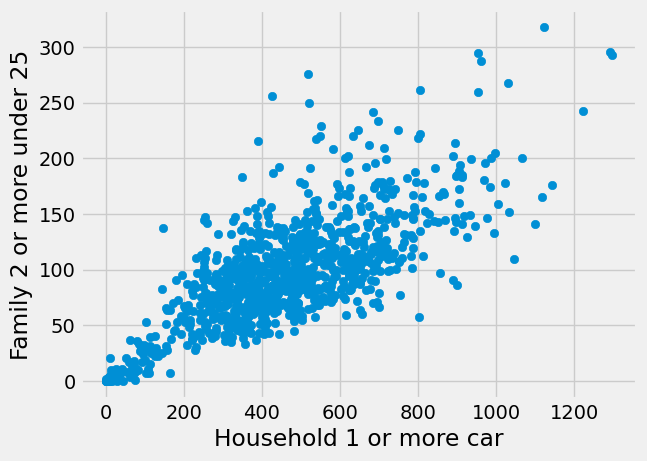

In [31]:
import matplotlib.pyplot as plt

plt.scatter(soc_data_paris["P12_RP_VOIT1P"], soc_data_paris["C12_NE24F2"])
plt.xlabel("Household 1 or more car")
plt.ylabel("Family 2 or more under 25")
plt.show()

In this scatter plot, we can see that there is a positive association between the **households in Paris with 1 or more cars** and the **families in Paris with 2 or more children under 25 years old**. From visualizing the data, we can get a better sense of relationships and associations but we cannot establish causality without more evidence. This helps us narrow down the focus of our research and develop further statistical models.

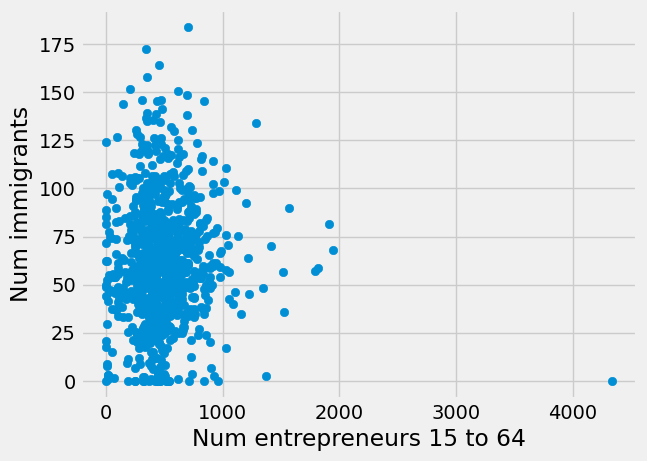

In [35]:
# DATA MISSING

plt.scatter(dem_data_paris["P12_POP_IMM"], act_data_paris["C12_ACT1564_CS2"])
plt.xlabel("Num entrepreneurs 15 to 64")
plt.ylabel("Num immigrants")
plt.show()

In this case, we do not see any clear association between the **the number of entrepreneurs between ages 15 to 64** and **the number of immigrants** in Paris. Sometimes we assume data will provide a certain result, but by visualizing it, we can get a more clear sense of the accuracy of our assumptions. 

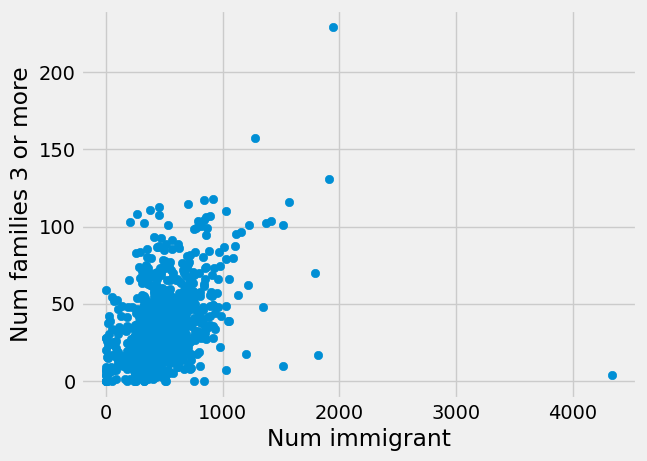

In [ ]:
plt.scatter(dem_data_paris["P12_POP_IMM"], soc_data_paris["C12_NE24F3"])
plt.xlabel("Num immigrant")
plt.ylabel("Num families 3 or more")
plt.show()


Number of immigrants vs. number of families with 3 or more kids under 25

Although there appears to be some association between **the number of immigrants** and the **number of families with 3 or more children** in Paris, it does not appear very strong. However, we can do further statistical testing in order to get more information. If you would like to learn more about this, it is taught in depth in Data 8 and other data science courses. We can analyze any columns we'd like, or even take a different subset of data. Try taking a look at these scatter plots if we only consider data outside of Paris proper.

# Maps

Scatter plots are great for noticing general trends, but what if we'd like to see how trends differ by location. For that we turn to maps that we will create below.

In [38]:
# Mapping Prerequisites
demographie = pd.read_csv("IRIS_DEMOGRAPHIE-2.csv", index_col=0)

geo_path = "iris-sociologie.geojson"
# load the geojson file
g = geojson.load(open(geo_path))
# view the geojson file as a geopandas dataframe 
# (similar to the dataframes you saw above, but with spatial data) 
geo = gpd.read_file(geo_path)
geo.head()

Skipping field geo_point_2d: unsupported OGR type: 3


,objectid,c12_ne24f,iris_num,libcom,m2_pop,c_cainsee,m2_ip,c12_ne24f1,c12_ne24f2,c12_ne24f3,...,tx12_menps,dep,ept,n_sq_ir,m2_emp,c12_men,c12_menpse,com,shape_leng,geometry
0,2037,430.184059,930510404,Noisy-le-Grand,120993.579796,93051,137986.307600,148.675220,190.210682,66.793863,...,29.507843,93,T9,930000981,133162.713781,975.314552,287.794286,93051,1683.142955,"POLYGON ((2.57277 48.84586, 2.57213 48.84555, ..."
1,2041,511.742349,930510503,Noisy-le-Grand,286430.403739,93051,393649.312714,227.282832,191.407556,71.129112,...,21.729354,93,T9,930003667,331823.948220,1080.387551,234.761237,93051,3075.628419,"POLYGON ((2.57378 48.83983, 2.57331 48.83953, ..."
2,2045,347.148124,930530104,Noisy-le-Sec,132735.121888,93053,143986.385543,189.523698,113.045499,34.016199,...,40.135130,93,T8,930000989,143986.385543,1106.733656,444.188995,93053,1991.207560,"POLYGON ((2.46956 48.89394, 2.46908 48.89366, ..."
3,2046,449.647047,930530105,Noisy-le-Sec,104480.782672,93053,125715.037380,172.645048,166.811013,91.755655,...,30.207180,93,T8,930000990,121669.843590,951.608874,287.454201,93053,1626.558112,"POLYGON ((2.46102 48.89321, 2.46139 48.89305, ..."
4,2073,676.255070,930550701,Pantin,134165.605307,93055,219953.235720,344.383860,266.850632,55.000554,...,40.954634,93,T8,930002374,208554.795192,1998.140953,818.331324,93055,3464.308809,"POLYGON ((2.40972 48.895, 2.40961 48.89369, 2...."


In [40]:
# create simple map with geojson outlines of arondissmonts
m1 = folium.Map(location=[48.8, 2.3], zoom_start=11)

folium.GeoJson(g).add_to(m1)

m1.save('images/simple-map.html') # save map to html file (Google Chrome bug workaround)

#IFrame('images/simple-map.html', width='100%', height='750px') # display saved html file

from IPython.display import display, IFrame
display(IFrame('images/simple-map.html', width='100%', height='750px'))

# click on the whitespace to the left of the map to toggle scrolling


In [41]:
demographie.head()

,N_SQ_IR,C_CAINSEE,N_QU,C_IR,C_TYPEIR,L_IR,M2_IP,M2_POP,M2_EMP,NOM_EPT,...,C12_POP15P_CS5,C12_POP15P_CS6,C12_POP15P_CS,CS3_CS56,P12_POP_ETR,TX12_POP_ETR,P12_POP_IMM,TX12_POP_IMM,SHAPE_Length,SHAPE_Area
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,750004651,75112,48.0,751124806,H,Quinze Vingts 6,35663.273678,31569.299621,32907.156379,Paris,...,216.698960,55.465073,1441.390537,3.031327,271.076525,11.628482,326.122252,13.989801,1074.403007,54817.007288
2,750004611,75112,48.0,751124807,H,Quinze Vingts 7,63724.185571,57681.480525,59621.609239,Paris,...,407.954128,107.881520,2065.037695,1.832804,361.338039,11.116247,505.601883,15.554397,1621.888235,91619.673610
3,750004683,75112,48.0,751124808,H,Quinze Vingts 8,36888.617306,32368.082580,32368.082580,Paris,...,223.437490,65.808063,1351.344232,2.677041,262.572809,11.217757,378.304109,16.162083,1297.312428,64396.187009
4,750004647,75112,48.0,751124809,H,Quinze Vingts 9,41811.631196,34551.616325,41092.399164,Paris,...,286.182600,124.914166,1623.895813,1.705357,391.649474,14.698936,513.750041,19.281473,1263.588885,60185.717211
5,750004652,75112,48.0,751124810,H,Quinze Vingts 10,51442.988290,47254.592209,50562.351004,Paris,...,256.602636,106.839679,1651.946137,2.192297,505.074201,15.886250,649.501286,20.428958,1254.206414,71374.621050


![title](images/pic2.png)

Above we can see the progression of the working class out of the city center. Now let's see what the results would look like using our data set from 2012 and discover for ourselves if the trends exhibited above in the paper by Anne Clerval.

In [50]:
# add together all worker columns to get the total number of workers
demographie['all_workers'] = demographie['C12_POP15P_CS1'] + demographie['C12_POP15P_CS2'] + \
demographie['C12_POP15P_CS3'] + demographie['C12_POP15P_CS4'] + \
demographie['C12_POP15P_CS5'] + demographie['C12_POP15P_CS6']

In [51]:
demographie['CS5_CS6'] = demographie['C12_POP15P_CS5'] + demographie['C12_POP15P_CS6']
# proportion of blue and white collar workers
demographie['white_blue_collar'] = demographie['CS5_CS6'] / demographie['all_workers']
# propoertion of professional workers
demographie['professionals'] = demographie['C12_POP15P_CS3'] / demographie['all_workers']
# proportion of the population under 15
demographie['Under 15'] = (demographie['P12_H0014'] + demographie['P12_F0014']) / demographie['P12_POP']
# proportion of the population that is foreign
demographie['foreigners'] = (demographie['P12_POP_ETR']) / demographie['P12_POP']
# proportion of the population that is immigrants
demographie['immigrant'] = (demographie['P12_POP_IMM']) / demographie['P12_POP']

In [ ]:
m2 = folium.Map(location=[48.8, 2.3], zoom_start=11)

folium.Choropleth(
 geo_data=g, # geojson 
 data=demographie, # dataframe
 columns=['IRIS', 'white_blue_collar'],   # first col must be IRIS, second col sets colors for overlay
 key_on='feature.properties.iris',   # key to match csv data with geojson areas
 fill_color='YlOrRd',
 bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
).add_to(m2)

folium.LayerControl().add_to(m2)

m2.save('images/choropleth-map-white-blue-collar.html') # save map to html file
IFrame('images/choropleth-map-white-blue-collar.html', width='100%', height='750px') # display saved html file

# click on the whitespace to the left of the cell to toggle scrolling


Similarly, Clerval looks at how the wealthy are simultaneously moving in to the locations held by the working class in the city center. We can also model this with our newer data to continue to explore Clerval's trends.

![title](images/pic1.png)

In [ ]:
m3 = folium.Map(location=[48.8, 2.3], zoom_start=11)

folium.Choropleth(
 geo_data=g, # geojson 
 data=demographie, # df
 columns=['IRIS', 'professionals'],   # first col must be IRIS, second col sets colors for overlay
 key_on='feature.properties.iris',   # key to match csv data with geojson areas
 fill_color='BuPu',
 bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
).add_to(m3)

folium.LayerControl().add_to(m3)

m3.save('images/choropleth-map-professional.html') # save map to html file
IFrame('images/choropleth-map-professional.html', width='100%', height='750px') # display saved html file

# click on the whitespace to the left of the cell to toggle scrolling


Now that we've explored the gentrification of Paris's city center, we can also continue mapping a variety of variables. Below we try to map the proportion of people under age 15, followed by the proportion of foreigners, as well as the proportion of immigrants. Is there anything you notice? Any relation to things we may have seen earlier with the plotting of the data?

In [54]:
m4 = folium.Map(location=[48.8, 2.3], zoom_start=11)

folium.Choropleth(
 geo_data=g, # geojson 
 data=demographie, # df
 columns=['IRIS', 'Under 15'],   # first col must be IRIS, second col sets colors for overlay
 key_on='feature.properties.iris',   # key to match csv data with geojson areas
 fill_color='BuGn',
 bins=[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 1.0]
).add_to(m4)

folium.LayerControl().add_to(m4)

m4.save('images/choropleth-map-under-15.html') # save map to html file
IFrame('images/choropleth-map-under-15.html', width='100%', height='750px') # display saved html file

# click on the whitespace to the left of the cell to toggle scrolling


In [ ]:
m5 = folium.Map(location=[48.8, 2.3], zoom_start=11)

folium.Choropleth(
 geo_data=g, # geojson 
 data=demographie, # df
 columns=['IRIS', 'foreigners'],   # first col must be IRIS, second col sets colors for overlay
 key_on='feature.properties.iris',   # key to match csv data with geojson areas
 fill_color='PuRd',
 bins=[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 1.0]
).add_to(m5)

folium.LayerControl().add_to(m5)

m5.save('images/choropleth-map-foreigners.html') # save map to html file
IFrame('images/choropleth-map-foreigners.html', width='100%', height='750px') # display saved html file

# click on the whitespace to the left of the cell to toggle scrolling


In [55]:
m6 = folium.Map(location=[48.8, 2.3], zoom_start=11)

folium.Choropleth(
 geo_data=g, # geojson 
 data=demographie, # df
 columns=['IRIS', 'immigrant'],   # first col must be IRIS, second col sets colors for overlay
 key_on='feature.properties.iris',   # key to match csv data with geojson areas
 fill_color='YlGn',
 bins=[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 1.0]
).add_to(m6)

folium.LayerControl().add_to(m6)

m6.save('images/choropleth-map-immigrant.html') # save map to html file
IFrame('images/choropleth-map-immigrant.html', width='100%', height='750px') # display saved html file

# click on the whitespace to the left of the cell to toggle scrolling


---
## What's Next?

Data science is a fast-growing field with applications in almost every subject you can imagine. Students and researchers alike have used Jupyter notebooks and data-driven methods to do everything from completing a lower-division class problem set to presenting a graduate research project. 

If you'd like to learn more about how to incorporate data science into your academic career:

* [DATA-8](http://data8.org) is offered every semester and is a great introduction to coding and statistics. The website includes links to the textbook, syllibi, and past homeworks.
* Data Science [Connector Courses](https://data.berkeley.edu/education/connectors) teach applied data science in everything from literature to cancer research. They can be taken with or after DATA-8.
* The Berkeley Institute for Data Science ([BIDS](https://bids.berkeley.edu/)) hosts data science talks, research resources organized by field, and office hours for those interested in more in-depth data science research.
* [DLAB](http://dlab.berkeley.edu/) also offers workshops and consulting to help you hone your skills.